# Make_Figure_PTEN_1C:  Uniqueness of trans effect

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import plot_utils as p
root = R'~\Github\WhenMutationsDontMatter\PTEN\Step_3_trans_effect\csv'

In [24]:
#df = pd.read_csv(root+R'\all_heatmap.csv')
#all_df = pd.read_csv(root+R'\sig_pval_heatmap.csv')
all_df = pd.read_csv(root+R"\all_pval_all_proteins.csv")
all_df

,Proteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Lscc_P_Value,Lscc_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,En_P_Value,En_Median,Colon_P_Value,Colon_Median
0,ARMH3,5.766739e-07,-0.405134,0.024047,-0.135941,0.222235,-0.37845,0.906857,-0.27970,NaN,NaN,NaN,NaN,0.034811,0.1503,NaN,NaN
1,CUTC,8.514758e-07,-0.553255,0.014672,-0.314307,0.056523,-1.01995,0.568489,-0.44585,0.349469,-0.48080,0.985704,-0.159424,0.330823,-0.2533,0.917530,-0.08210
2,CUL2,2.783477e-06,-0.586396,0.677585,0.017886,0.868772,0.05695,0.999848,0.04745,0.665878,0.17195,0.991659,0.033091,0.957970,0.0232,0.902073,-0.07690
3,PIP4K2A,2.783477e-06,-0.838882,0.038186,-0.224713,0.847730,0.04535,0.999848,0.24750,0.670623,-0.07435,0.985704,0.052955,0.502967,0.1690,0.883481,0.10135
4,GDI2,2.783477e-06,-0.610188,0.827100,0.001559,NaN,NaN,0.999848,-0.03735,0.789708,0.14995,0.985704,-0.067389,0.283190,0.1286,0.999502,-0.04450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,RETNLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.17860
15093,SYCE3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18575
15094,TFF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.33000
15095,TRIM52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.30270


In [25]:
for index, row in all_df.iterrows():
    cancer_names = ['Gbm','Hnscc','Luad','Lscc','Brca','Ov','En','Colon']
    label = []
    for cancer in cancer_names:
        if row[cancer+'_P_Value'] < 0.05:
            label.append(str(cancer))
    labeled = '_'.join(label)
    #print(type(labeled))
    all_df.loc[index,'sig'] = str(labeled)
all_df

,Proteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Lscc_P_Value,Lscc_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,En_P_Value,En_Median,Colon_P_Value,Colon_Median,sig
0,ARMH3,5.766739e-07,-0.405134,0.024047,-0.135941,0.222235,-0.37845,0.906857,-0.27970,NaN,NaN,NaN,NaN,0.034811,0.1503,NaN,NaN,Gbm_Hnscc_En
1,CUTC,8.514758e-07,-0.553255,0.014672,-0.314307,0.056523,-1.01995,0.568489,-0.44585,0.349469,-0.48080,0.985704,-0.159424,0.330823,-0.2533,0.917530,-0.08210,Gbm_Hnscc
2,CUL2,2.783477e-06,-0.586396,0.677585,0.017886,0.868772,0.05695,0.999848,0.04745,0.665878,0.17195,0.991659,0.033091,0.957970,0.0232,0.902073,-0.07690,Gbm
3,PIP4K2A,2.783477e-06,-0.838882,0.038186,-0.224713,0.847730,0.04535,0.999848,0.24750,0.670623,-0.07435,0.985704,0.052955,0.502967,0.1690,0.883481,0.10135,Gbm_Hnscc
4,GDI2,2.783477e-06,-0.610188,0.827100,0.001559,NaN,NaN,0.999848,-0.03735,0.789708,0.14995,0.985704,-0.067389,0.283190,0.1286,0.999502,-0.04450,Gbm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,RETNLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.17860,
15093,SYCE3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18575,
15094,TFF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.33000,
15095,TRIM52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.30270,


In [30]:
l = all_df.loc[all_df['Lscc_P_Value'] < 0.05]
l[['Proteomics', 'Lscc_P_Value', 'Gbm_P_Value', 'Hnscc_P_Value', 'Luad_P_Value','sig']]

,Proteomics,Lscc_P_Value,Gbm_P_Value,Hnscc_P_Value,Luad_P_Value,sig
48,VPS26A,0.047096,0.000622,0.932416,0.085454,Gbm_Lscc
420,ATAD1,0.000006,0.005723,0.031703,0.195221,Gbm_Hnscc_Lscc
6524,BTAF1,0.001136,0.460174,0.080719,0.012853,Luad_Lscc


In [5]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05: # changed from .1????
            numSig += 1
            
    return numSig

In [6]:
all_df["Num_sig"] = all_df.loc[:,["Gbm_P_Value","Hnscc_P_Value","Luad_P_Value","Lscc_P_Value", "Brca_P_Value","Ov_P_Value","En_P_Value","Colon_P_Value"]].apply(Pvalue_sig, axis = 1)
#all_df = all_df.sort_values(by=['Num_sig'],ascending=False)
all_df

,Proteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Lscc_P_Value,Lscc_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,En_P_Value,En_Median,Colon_P_Value,Colon_Median,sig,Num_sig
0,ARMH3,5.766739e-07,-0.405134,0.024047,-0.135941,0.222235,-0.37845,0.906857,-0.27970,NaN,NaN,NaN,NaN,0.034811,0.1503,NaN,NaN,Gbm_Hnscc_En,3
1,CUTC,8.514758e-07,-0.553255,0.014672,-0.314307,0.056523,-1.01995,0.568489,-0.44585,0.349469,-0.48080,0.985704,-0.159424,0.330823,-0.2533,0.917530,-0.08210,Gbm_Hnscc,2
2,CUL2,2.783477e-06,-0.586396,0.677585,0.017886,0.868772,0.05695,0.999848,0.04745,0.665878,0.17195,0.991659,0.033091,0.957970,0.0232,0.902073,-0.07690,Gbm,1
3,PIP4K2A,2.783477e-06,-0.838882,0.038186,-0.224713,0.847730,0.04535,0.999848,0.24750,0.670623,-0.07435,0.985704,0.052955,0.502967,0.1690,0.883481,0.10135,Gbm_Hnscc,2
4,GDI2,2.783477e-06,-0.610188,0.827100,0.001559,NaN,NaN,0.999848,-0.03735,0.789708,0.14995,0.985704,-0.067389,0.283190,0.1286,0.999502,-0.04450,Gbm,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,RETNLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.17860,,0
15093,SYCE3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18575,,0
15094,TFF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.33000,,0
15095,TRIM52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.30270,,0


In [7]:
#Keep trans genes that are significant in atleast 1 cancer. 

all_df1 = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
len(all_df1.Proteomics.unique())

2630

In [8]:
vc = all_df1['sig'].value_counts()
df = vc.to_frame()
df

,sig
Gbm,1622
Hnscc,353
En,275
Gbm_Hnscc,128
Gbm_En,89
Luad,48
Hnscc_En,29
Hnscc_Luad,24
Gbm_Luad,22
Gbm_Hnscc_En,21


In [9]:
#df = df.loc[df['sig'] > 1]
#df

In [10]:
ns = {'Colon': 0, 'Brca': 0, 'Lscc': 0, 'Ov': 0}
ns_df = pd.DataFrame.from_dict(ns, orient = 'index', columns=['sig'])
ns_df

,sig
Colon,0
Brca,0
Lscc,0
Ov,0


In [11]:
both = df.append(ns_df)
both = both.reset_index()
both = both.rename(columns = {'index': 'cancer'})
both


,cancer,sig
0,Gbm,1622
1,Hnscc,353
2,En,275
3,Gbm_Hnscc,128
4,Gbm_En,89
5,Luad,48
6,Hnscc_En,29
7,Hnscc_Luad,24
8,Gbm_Luad,22
9,Gbm_Hnscc_En,21


In [14]:
s = [0,1,2,5,19,18,17,16,3,4,6,7,8,9,10,11,12,13,14,15]
both = both.reindex(s)
both

,cancer,sig
0,Gbm,1622
1,Hnscc,353
2,En,275
5,Luad,48
19,Ov,0
18,Lscc,0
17,Brca,0
16,Colon,0
3,Gbm_Hnscc,128
4,Gbm_En,89


# dumbbell

In [19]:
# Create df with location of cancer points

# 'Gbm': 7, 'Hnscc': 6, 'En': 5, 'Luad': 4, 'Ov': 3, 'Lscc': 2, 'Brca': 1, 'Colon': 0,

y1 = {'Gbm': 7, 'Hnscc': 6, 'En': 5, 'Luad': 4, 'Ov': 3, 'Lscc': 2, 'Brca': 1, 'Colon': 0,
      'Gbm_Hnscc': 7, 'Gbm_En': 7, 'Hnscc_En': 6, 'Hnscc_Luad': 6, 'Gbm_Luad': 7, 
      'Gbm_Hnscc_En': 7, 'Gbm_Hnscc_Luad': 7, 'Gbm_Luad_Ov': 7, 'Gbm_Luad_En': 7, 'Gbm_Lscc': 7,
      'Gbm_Hnscc_Lscc': 7, 'Luad_Lscc': 4}

y2= {'Gbm': 7, 'Hnscc': 6, 'En': 5, 'Luad': 4, 'Ov': 3, 'Lscc': 2, 'Brca': 1, 'Colon': 0,
     'Gbm_Hnscc': 6, 'Gbm_En': 5, 'Hnscc_En': 5, 'Hnscc_Luad': 4, 'Gbm_Luad': 4, 
     'Gbm_Hnscc_En': 6, 'Gbm_Hnscc_Luad': 6, 'Gbm_Luad_Ov': 4, 'Gbm_Luad_En': 4, 'Gbm_Lscc': 2,
      'Gbm_Hnscc_Lscc': 6, 'Luad_Lscc': 2}

y3= {'Gbm': 7, 'Hnscc': 6, 'En': 5, 'Luad': 4, 'Ov': 3, 'Lscc': 2, 'Brca': 1, 'Colon': 0,
     'Gbm_Hnscc': 6, 'Gbm_En': 5, 'Hnscc_En': 5, 'Hnscc_Luad': 4, 'Gbm_Luad': 4, 
     'Gbm_Hnscc_En': 5, 'Gbm_Hnscc_Luad': 4, 'Gbm_Luad_Ov': 3, 'Gbm_Luad_En': 5, 'Gbm_Lscc': 2,
      'Gbm_Hnscc_Lscc': 2, 'Luad_Lscc': 2}
        

y1_df = pd.DataFrame.from_dict(y1, orient = 'index', columns=['y1'])
y2_df = pd.DataFrame.from_dict(y2, orient = 'index', columns=['y2'])
y3_df = pd.DataFrame.from_dict(y3, orient = 'index', columns=['y3'])
ordered_df = y1_df.join(y2_df)
ordered_df = ordered_df.join(y3_df)
ordered_df

,y1,y2,y3
Gbm,7,7,7
Hnscc,6,6,6
En,5,5,5
Luad,4,4,4
Ov,3,3,3
Lscc,2,2,2
Brca,1,1,1
Colon,0,0,0
Gbm_Hnscc,7,6,6
Gbm_En,7,5,5


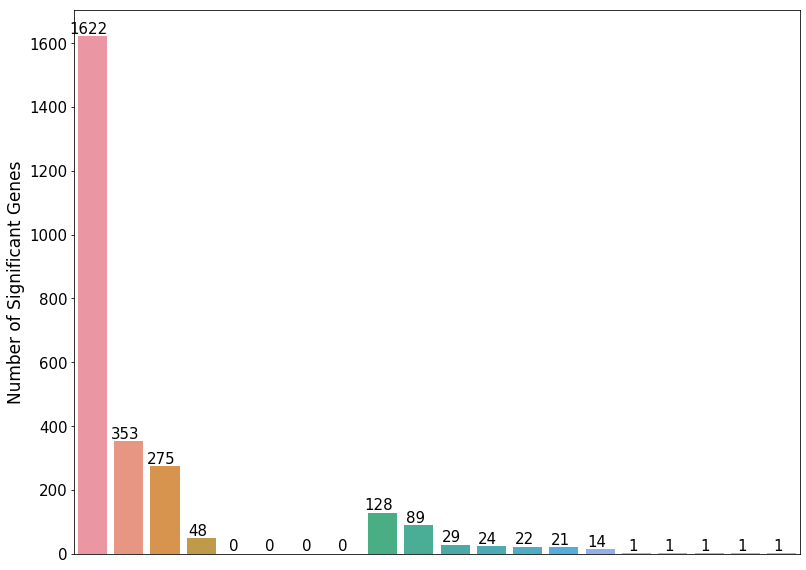

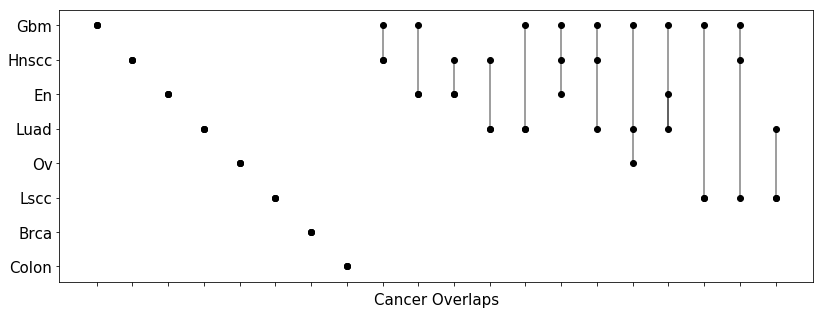

In [22]:
# Create histogram

# add a subplot with no frame
plt.figure(figsize=(13,10))
o = sns.barplot(x=both['cancer'], y=both['sig'], data=both)#, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None,
plt.setp(o.get_xticklabels(),rotation=90)

# Add count of sig genes above each bar
for p in o.patches:
    o.annotate('{:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 15)


o.set_xlabel('', size = 15)
o.set_ylabel('Number of Significant Genes', size = 17)
o.get_xaxis().set_visible(False) # Hide x-axis
o.yaxis.set_tick_params(labelsize=15)


# Create vertical dumbell plot using scatterplots
plt.rcParams.update({'font.size': 15})
d = plt.figure(figsize=(13.5,5))
my_range=range(1,len(ordered_df.index)+1) #range count for x axis num
d = plt.vlines(x=my_range, ymin=ordered_df['y1'], ymax=ordered_df['y2'], color='black', alpha=0.5) #vertical lines
d = plt.vlines(x=my_range, ymin=ordered_df['y2'], ymax=ordered_df['y3'], color='black', alpha=0.5)
d = plt.scatter(my_range, ordered_df['y1'], color='black', alpha=1) #plots first point
d = plt.scatter(my_range, ordered_df['y2'], color='black', alpha=1) # plots second point
d = plt.scatter(my_range, ordered_df['y3'], color='black', alpha=1) # plots third point

# Add title and axis names
labels = list(ordered_df.index[:8]) # label 8 single cancer names y axis
labels.reverse()
plt.xticks(my_range, []) #none for x axis
plt.yticks(range(0,8), labels) # single cancer names
#plt.ylabel('Cancer')
plt.xlabel('Cancer Overlaps')

#o.savefig("PTEN_Fig_1_barplot.png", dpi = 300)
d.figure.savefig("PTEN_Fig_1_checkerboard.png", dpi = 300)

In [23]:
both

,cancer,sig
0,Gbm,1622
1,Hnscc,353
2,En,275
5,Luad,48
19,Ov,0
18,Lscc,0
17,Brca,0
16,Colon,0
3,Gbm_Hnscc,128
4,Gbm_En,89
